In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import eif as iso

# 1. Загрузка данных

In [85]:
%load_ext sql
%sql sqlite:///Diamonds

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [86]:
db = %sql select * from Diamond
db = db.DataFrame()
db = db.set_index("id")

 * sqlite:///Diamonds
Done.


# 2. Data preproccesing

In [87]:
db[:5]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [88]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.4+ MB


In [89]:
db.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797576,61.746377,57.451694,5.729163,5.732896,3.537351,7.783822
std,0.475939,1.436796,2.234569,1.125244,1.154799,0.711002,1.016828
min,0.200000,43.000000,44.000000,0.000000,0.000000,0.000000,5.787000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,7.780000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,8.581000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,9.842000


In [90]:
db.describe(include=object)

,cut,color,clarity
count,40455,40455,40455
unique,5,7,8
top,Ideal,G,SI1
freq,16230,8410,9779


In [91]:
db.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [92]:
db.nunique()

carat       269
cut           5
color         7
clarity       8
depth       179
table       122
x           546
y           544
z           366
price      3512
dtype: int64

/tmp/ipykernel_6479/4111826463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db.corr(method='spearman'), annot=True, fmt=".2f")


<AxesSubplot: >

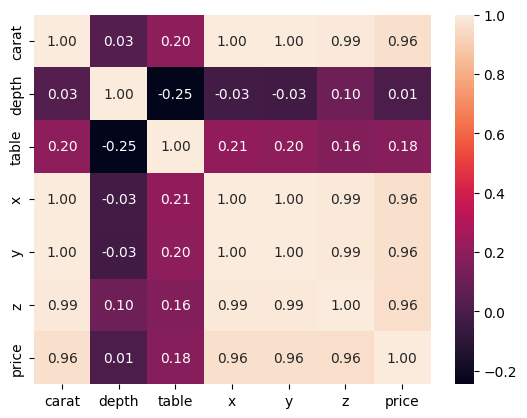

In [93]:
sns.heatmap(db.corr(method='spearman'), annot=True, fmt=".2f")

## 2.1 One Hot Encoding + Normalization

In [94]:
db2 = pd.get_dummies(data=db, drop_first=True)

In [95]:
y = db2["price"]
db_x = db2.drop(columns=("price"))
x = db_x.values
columns = db_x.columns

In [143]:
min_max_Scaler = MinMaxScaler()
x_scaled = min_max_Scaler.fit_transform(x)
db2 = pd.DataFrame(x_scaled, columns=columns)
db2["price"] = y.values
db2[:10]

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.020790,0.538889,0.274510,0.401304,0.072666,0.084277,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.353
1,0.168399,0.547222,0.235294,0.597765,0.109677,0.127044,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.183
2,0.108108,0.522222,0.294118,0.531657,0.097453,0.111321,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.983
3,0.182952,0.561111,0.254902,0.608939,0.110357,0.129560,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.371
4,0.033264,0.536111,0.294118,0.418994,0.077250,0.088679,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.588
5,0.068607,0.511111,0.254902,0.482309,0.088285,0.100314,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.496
6,0.320166,0.530556,0.294118,0.716015,0.129542,0.149686,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.979
7,0.027027,0.472222,0.235294,0.421788,0.077419,0.085535,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.877
8,0.024948,0.552778,0.235294,0.405959,0.074533,0.086478,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.554
9,0.014553,0.522222,0.254902,0.387337,0.069949,0.080503,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.683


In [119]:
db2.describe()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,...,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.124236,0.520733,0.263759,0.533442,0.097333,0.111237,0.091015,0.401187,0.255543,0.222544,...,0.100606,0.052453,0.032431,0.241725,0.171079,0.150266,0.228872,0.069386,0.092572,7.783822
std,0.098948,0.039911,0.043815,0.104771,0.019606,0.022359,0.287634,0.490145,0.436171,0.415959,...,0.300810,0.222942,0.177144,0.428134,0.376583,0.357336,0.420112,0.254112,0.289835,1.016828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.787000
25%,0.041580,0.500000,0.235294,0.438547,0.080136,0.091509,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.851000
50%,0.103950,0.522222,0.254902,0.529795,0.096774,0.110692,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.780000
75%,0.174636,0.541667,0.294118,0.608939,0.111036,0.126730,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.581000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.842000


In [99]:
db2 = db2.drop(columns = ["x", "y", "z"])

<AxesSubplot: xlabel='price', ylabel='Count'>

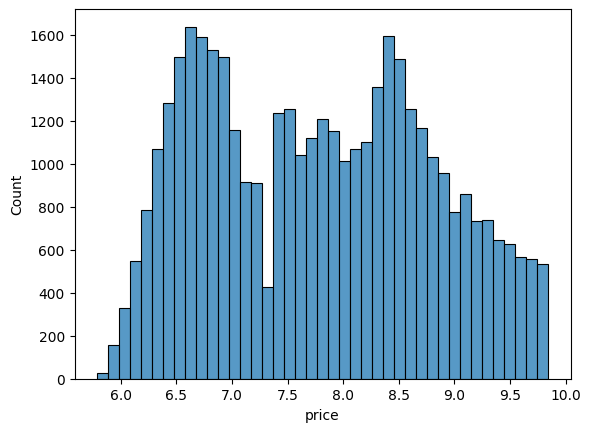

In [100]:
sns.histplot(db2['price'])

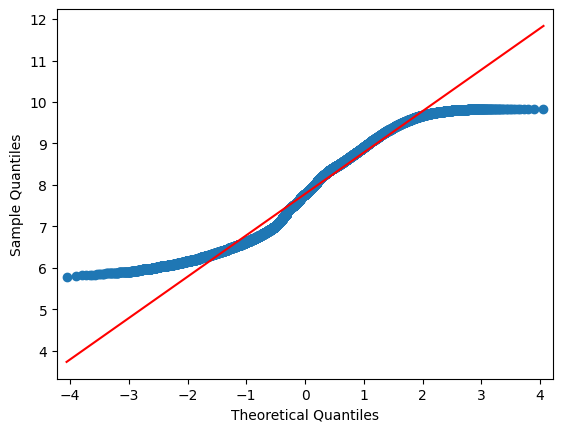

In [101]:
qqplot_price = sm.qqplot(db2["price"], line='r')

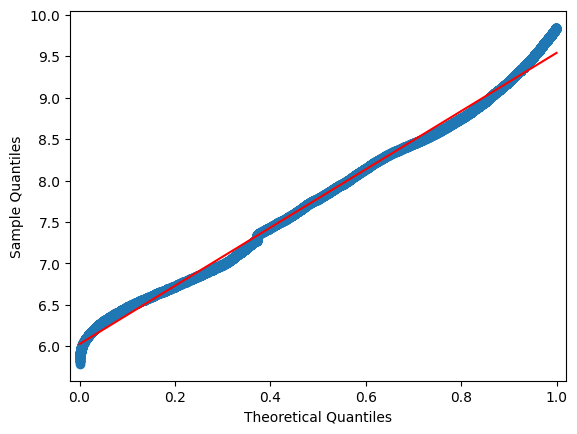

In [102]:
qqplot_price = sm.qqplot(db2['price'], dist=stats.uniform, line='r')

<AxesSubplot: xlabel='price', ylabel='Count'>

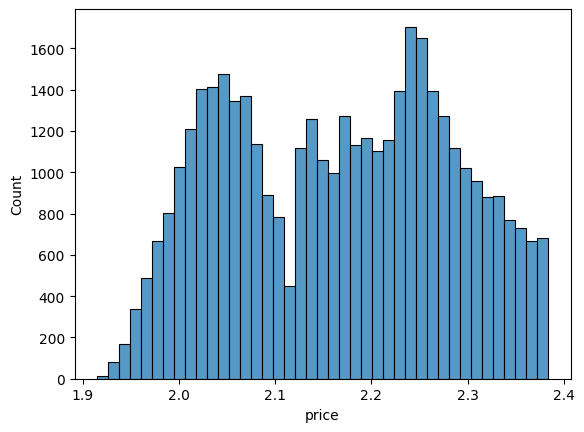

In [103]:
sns.histplot(np.log(db2['price'] + 1))

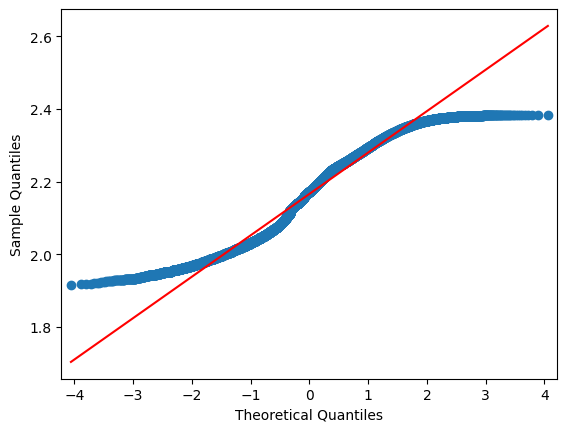

In [104]:
qqplot_price = sm.qqplot(np.log(db2['price'] + 1), line='r')

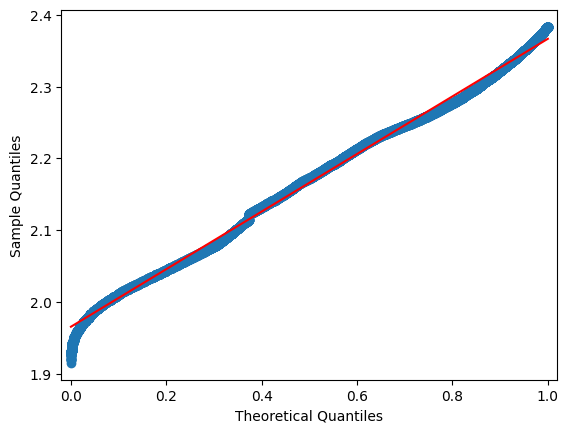

In [105]:
qqplot_price = sm.qqplot(
    np.log(db2['price'] + 1), dist=stats.uniform, line='r')

## 2.2 Removing outliers

In [106]:
db_temp = db2[["carat", "depth", "table", "price"]].values

In [107]:
column_eif = iso.iForest(
    db_temp, ntrees=500, sample_size=256, ExtensionLevel=1)

In [108]:
S1 = column_eif.compute_paths(X_in = db_temp)

In [109]:
int(len(S1) * 0.05)

2022

In [110]:
np.argsort(S1)[-int(len(S1) * 0.05):]

array([24957, 29431, 16473, ...,  6403,  1522,  7978])

In [111]:
mod_data = db2.loc[np.argsort(S1)[:-int(len(S1) * 0.05)]]

In [112]:
db2.std()[:4], mod_data.std()[:4]

(carat       0.098948
 depth       0.039911
 table       0.043815
 cut_Good    0.287634
 dtype: float64,
 carat       0.084162
 depth       0.036290
 table       0.041555
 cut_Good    0.284314
 dtype: float64)

In [113]:
mod_data.describe()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
count,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,...,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000
mean,0.113951,0.521006,0.262137,0.088700,0.411964,0.254365,0.223037,0.186610,0.180678,0.210496,...,0.094294,0.048370,0.033097,0.242968,0.161112,0.152473,0.231650,0.072047,0.095829,7.718256
std,0.084162,0.036290,0.041555,0.284314,0.492195,0.435509,0.416289,0.389604,0.384756,0.407666,...,0.292241,0.214549,0.178891,0.428882,0.367639,0.359484,0.421892,0.258570,0.294361,0.961871
min,0.004158,0.305556,0.098039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.844000
25%,0.039501,0.502778,0.235294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.834000
50%,0.103950,0.522222,0.254902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.728000
75%,0.170478,0.541667,0.294118,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.505000
max,0.417879,0.708333,0.470588,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.753000


## 2.3 Loading modified data

In [114]:
from sqlalchemy import create_engine

In [115]:
conn = create_engine("sqlite:///Diamonds")

In [116]:
mod_data = mod_data.sort_index()
mod_data.to_sql(name="Diamond_reworked", con=conn, if_exists="replace")

38433

# 3. Comperison baseline-models

In [120]:
train_df = %sql select * from Diamond_reworked
train_df = train_df.DataFrame()
train_df = train_df.set_index("index")
train_df[:5]

 * sqlite:///Diamonds
Done.


,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
index,,,,,,,,,,,,,,,,,,,,,
0,0.020790,0.538889,0.274510,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.353
1,0.168399,0.547222,0.235294,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.183
2,0.108108,0.522222,0.294118,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.983
3,0.182952,0.561111,0.254902,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.371
4,0.033264,0.536111,0.294118,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.588


In [121]:
Y_train = train_df["price"]
Y_train[:5]

/tmp/ipykernel_6479/598370826.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Y_train[:5]


index
0    6.353
1    9.183
2    7.983
3    8.371
4    6.588
Name: price, dtype: float64

In [122]:
X_train = train_df.drop(columns=("price"))
X_train[:5]

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
index,,,,,,,,,,,,,,,,,,,,
0,0.020790,0.538889,0.274510,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.168399,0.547222,0.235294,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.108108,0.522222,0.294118,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.182952,0.561111,0.254902,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.033264,0.536111,0.294118,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [145]:
X_test = pd.read_csv("/home/user/projects_jupyter/Diamond/diamonds-databcn0722/test.csv")
X_test = X_test.set_index("id")
X_test[:5]

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67


In [146]:
Y_test = pd.read_csv("/home/user/projects_jupyter/Diamond/diamonds-databcn0722/sample_submission.csv")
Y_test = Y_test.set_index("id")
Y_test[:5]

,price
id,
0,7.547901
1,7.049216
2,8.696350
3,8.515766
4,7.334336


In [147]:
X_test = pd.get_dummies(data=X_test, drop_first=True)
X_test[:5]

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,0.32,60.5,58.0,4.43,4.49,2.70,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1.24,62.9,60.0,6.80,6.74,4.26,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,1.66,62.0,59.0,7.55,7.60,4.70,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.75,60.6,56.0,5.94,5.90,3.59,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1.50,64.8,55.0,7.26,7.15,4.67,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [149]:
X_test_scaled = min_max_Scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.describe()

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,...,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,0.124539,0.521069,0.264189,0.534184,0.097443,0.111411,0.090768,0.394587,0.256062,0.228328,...,0.155803,0.100260,0.050871,0.035447,0.243678,0.168558,0.155135,0.222395,0.062885,0.097961
std,0.097338,0.039445,0.043809,0.103470,0.018732,0.021684,0.287289,0.488780,0.436473,0.419770,...,0.362682,0.300357,0.219743,0.184913,0.429317,0.374375,0.362047,0.415871,0.242764,0.297273
min,0.000000,0.216667,-0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.502778,0.235294,0.440410,0.080475,0.091824,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.106029,0.525000,0.254902,0.531657,0.097114,0.111006,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.174636,0.541667,0.294118,0.608939,0.111036,0.127044,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.817048,1.000000,0.568627,0.944134,0.171477,0.202201,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
X_test_scaled = X_test_scaled.drop(columns=['x', 'y', 'z'])

In [154]:
regression = LinearRegression()
regression.fit(X_train.values, Y_train.values)

LinearRegression()

In [157]:
y_pred = regression.predict(X_test_scaled)
y_pred[:5]

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 6.37577703,  8.58220289, 10.02727813,  7.61697202,  9.4073308 ])

In [159]:
mean_squared_error(Y_test.values, y_pred)

2.501376123133268